In [1]:
import ttvfast
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from ttvfast import models
import pdb



gravity =  0.000295994511                        # AU^3/day^2/M_sun
stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


planet1 = models.Planet(
    mass=0.00954588, #0.00002878248,                         # M_sun
    period=1.4079405,#1.0917340278625494e+01,              # days
    eccentricity=0,#5.6159310042858110e-02,
    inclination=88.778,#9.0921164935951211e+01,         # degrees
    longnode=-1.1729336712101943e-18,           # degrees
    argument=1.8094838714599581e+02,            # degrees
    mean_anomaly= -90 #-8.7093652691581923e+01,       # degrees
)

planet2 = models.Planet(
    mass=0.00954588,#0.00061895914,
    period=200,#1.4079405,#2.2266898036209028e+01,
    eccentricity= 0.7, #5.6691301931178648e-02,
    inclination=8.7598285693573246e+01,
    longnode=4.6220554014026838e-01,
    argument=1.6437004273382669e+00,
    mean_anomaly=-1.9584857031843157e+01,
)

planets = [planet1, planet2]
Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
dt = 0.02                                       # days
Total = 510 #1700                                    # days

results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
#print(results)

In [2]:
#print(results.keys())
#print(results["positions"][2])
whichplanet = results["positions"][0]
whichtransit = results["positions"][1]
transittimes = results["positions"][2]
planet1transits = []
planet1times = []
transittimesplanet0 = []
transitnumberplanet0 = []
for i in range(375):
    a = whichplanet[i]
    condition = a==0  
    if condition: 
        transittimesplanet0.append(transittimes[i] )
        transitnumberplanet0.append(whichtransit[i] )

In [3]:
# df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/test.txt', sep=' ')
df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/newdatawithoutbadthings.txt', sep=' ')
df

,Time,Uncertainty
0,2.459016e+06,0.000002
1,2.459033e+06,0.000002
2,2.459061e+06,0.000002
3,2.459085e+06,0.000002
4,2.459092e+06,0.000003
5,2.459095e+06,0.000009
6,2.459102e+06,0.000002
7,2.459116e+06,0.000003
8,2.459126e+06,0.000002
9,2.459140e+06,0.000003


In [4]:
brucetransittime=np.array(df['Time'])
#brucetransittime= 1.40794050*brucetransitnumber + 2458779.3750828
brucetransitnumber= np.round((brucetransittime-2458779.3750828)/1.40794050)
#brucex= brucetransitnumber
#brucey=np.array(df['dT[sec]'])
bruceerr= np.array(df['Uncertainty'])*60*60*24
#fig, ax = plt.subplots(figsize=(16, 8))

#plt.errorbar(brucex, brucey, yerr = bruceerr, fmt = 'o')
#ax.set_ylabel('seconds');
#ax.set_xlabel('transit number');

In [5]:
actualbrucetransittime = np.array(df['Time'])-2458700

In [6]:
print(actualbrucetransittime[0])

315.9088683668524


In [7]:
print(transittimesplanet0[0])

66.703572003636


In [8]:
actualbrucetransittime[14]-actualbrucetransittime[0]

-1.407952366862446

In [9]:
transittimesplanet0[0]- actualbrucetransittime[0]

-249.2052963632164

In [10]:
transittimesplanet0 = np.array(transittimesplanet0)
print(transittimesplanet0[np.array([0, 2, 5])])

[66.703572   69.51945347 73.74333002]


In [11]:
#for i in range(29):
    #print('datapoint number', i,'coresponds to transit time', transittimesplanet0[i] )
#print(transittimesplanet0[9])
#print(transittimesplanet0[157])
#print(transittimesplanet0[174])
#print(transittimesplanet0[311])
for i in range(14):
    print(' bruce transit number', brucetransitnumber[i],'coresponds to transit time', actualbrucetransittime[i] )
    #for j in range(len(transittimesplanet0)):
        #print(transittimesplanet0[i])
        #condition = actualbrucetransittime[i]==transittimesplanet0[i]
        #if condition: 
            #print(i)
transitswewant = (brucetransitnumber + 9)
transitswewant = (transitswewant.astype(int))
#print(transitswewant)

 bruce transit number 168.0 coresponds to transit time 315.9088683668524
 bruce transit number 180.0 coresponds to transit time 332.80413679406047
 bruce transit number 200.0 coresponds to transit time 360.9629293610342
 bruce transit number 217.0 coresponds to transit time 384.8978941459209
 bruce transit number 222.0 coresponds to transit time 391.93759056413546
 bruce transit number 224.0 coresponds to transit time 394.753486501053
 bruce transit number 229.0 coresponds to transit time 401.793159971945
 bruce transit number 239.0 coresponds to transit time 415.87255670595914
 bruce transit number 246.0 coresponds to transit time 425.728129317984
 bruce transit number 256.0 coresponds to transit time 439.80752397188917
 bruce transit number 0.0 coresponds to transit time 79.37508499994874
 bruce transit number 94.0 coresponds to transit time 211.72136700013652
 bruce transit number 143.0 coresponds to transit time 280.7103829998523
 bruce transit number 150.0 coresponds to transit ti

In [12]:
print((np.array(transittimesplanet0)[transitswewant]-actualbrucetransittime) * 24 * 60 * 60)

[-136.33910311 -150.10416608 -174.18533778 -193.84287186 -199.66576359
 -203.4872703  -207.27673653 -218.92133172 -226.13875391 -231.69492244
    8.81725948  -89.71567339 -107.99827277 -115.55639567 -134.04587027]


In [13]:
chisq = np.sum(((actualbrucetransittime - np.array(transittimesplanet0)[transitswewant]) * 24 * 60 * 60)**2 / bruceerr**2)
print(chisq)

9020588.128618864


In [14]:
def loglikelihood(p, actualbrucetransittime, bruceerr, yesplot= False): #here p is an array of the parameters: let's define p[0] = slope, and p[1] = intercept
    #slope = p[0]
    #intercept = p[1]
    #quad = p[2]
    #model = slope*x + intercept+ quad*x**2
    #chisq = np.sum((y - model)**2 / e**2)
    
    gravity =  0.000295994511                        # AU^3/day^2/M_sun
    stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


    planet1 = models.Planet(
        mass = 0.00954588, #0.00002878248,                         # M_sun
        period = p[7],#1.4079405,#1.0917340278625494e+01,              # days
        eccentricity = 0,#5.6159310042858110e-02,
        inclination = 20,#88.778,#9.0921164935951211e+01,         # degrees
        longnode = -1.1729336712101943e-18,           # degrees
        argument = 1.8094838714599581e+02,            # degrees
        mean_anomaly = p[8],#-90 #-8.7093652691581923e+01,       # degrees
    )

    planet2 = models.Planet(
        mass = p[0],#0.00954588,#0.00061895914,
        period = p[1],#200,#1.4079405,#2.2266898036209028e+01,
        eccentricity = p[2],#0.7, #5.6691301931178648e-02,
        inclination = p[3],#8.7598285693573246e+01,
        longnode = p[4],#4.6220554014026838e-01,
        argument = p[5],#1.6437004273382669e+00,
        mean_anomaly = p[6],#-1.9584857031843157e+01,
    )

    planets = [planet1, planet2]
    Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
    dt = 0.02                                       # days
    Total = 510 #1700                                    # days

    results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
    whichplanet = results["positions"][0]
    whichtransit = results["positions"][1]
    transittimes = results["positions"][2]
    planet1transits = []
    planet1times = []
    transittimesplanet0 = []
    transitnumberplanet0 = []
    for i in range(375):
        a = whichplanet[i]
        condition = a == 0  
        if condition: 
            transittimesplanet0.append(transittimes[i] )
            transitnumberplanet0.append(whichtransit[i] )
    
    
    if yesplot: 
        fig, ax = plt.subplots(figsize=(16, 8))
    #m=np.mean((actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60)
    #model data- model line 
    #plt.errorbar(brucetransitnumber, (actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60-m, yerr = bruceerr, fmt = 'o-', label = 'Data')
    #print(actualbrucetransittime)
    #print(np.array(transittimesplanet0)[transitswewant])
    #bruce data- model line 
    #plt.plot(brucetransitnumber, (np.array(transittimesplanet0)[transitswewant]-1.4079405*brucetransitnumber)*24*60*60-m,"o-", label = 'Model')
    #ax.set_ylabel('seconds');
    '''ax.set_xlabel('transit number');
    ax.set_title('mass = '+ str(p[0])+ ' period ='+ str(p[1]))
    plt.show()'''
    '''print(np.array(transittimesplanet0)[transitswewant[0:5]])
    print(actualbrucetransittime[0:5])'''
    #print("transits we want",np.array(transittimesplanet0)[transitswewant])
    #print("actual brue transits",actualbrucetransittime)
    #print("actual bruce - transits we want",actualbrucetransittime-np.array(transittimesplanet0)[transitswewant])
    pbruce = np.polyfit(brucetransitnumber,actualbrucetransittime,1, w= 1/bruceerr)
    pmodel = np.polyfit(brucetransitnumber,np.array(transittimesplanet0)[transitswewant],1,w= 1/bruceerr)
    brucetrend = np.polyval(pbruce,brucetransitnumber)
    modeltrend = np.polyval(pmodel,brucetransitnumber)
    brucetransittimecorrected = actualbrucetransittime - brucetrend
    modeltransittimecorrected = np.array(transittimesplanet0)[transitswewant] - modeltrend
    if yesplot:
        plt.errorbar(brucetransitnumber,brucetransittimecorrected*60*60*24, yerr = bruceerr, fmt = 'o-', label = 'Corrected Data')
        print(actualbrucetransittime)
        print(np.array(transittimesplanet0)[transitswewant])
        #bruce data- model line 
        plt.plot(brucetransitnumber, modeltransittimecorrected*60*60*24,"o-", label = 'Corrected Model')
        ax.set_ylabel('seconds');
        ax.set_xlabel('transit number');
        ax.set_title('mass = '+ str(p[0])+ ' period ='+ str(p[1])+ 'periastron ='+ str(p[5])) 
        plt.show()
    chisq = np.sum((brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)**2/ bruceerr**2)
    #print(brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)
    #print(bruceerr)
    negloglikelihood = 0.5 * chisq
    return negloglikelihood


In [15]:
loglikelihood([0.00954588,200,0.6,8.7598285693573246e+01,4.6220554014026838e-01,1.6437004273382669e+00,-1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr)

849.3221498613184

In [16]:
print(brucetransitnumber)


[168. 180. 200. 217. 222. 224. 229. 239. 246. 256.   0.  94. 143. 150.
 167.]


In [17]:
#grid search 
periodstotest = np.linspace(50,1000,300)
massestotest = np.linspace(0.1,13,100)/1047.572 #conversion from jupiter to solar masses
periastrontotest = np.linspace(0,360,100)
''''for j in range(len(massestotest)):
        thismass= massestotest[j]
        for k in range(len(periodstotest)):
            thisperiod= periodstotest[k]
            for m in range(len(meananomolytotest)):
                thismeananomoly= meananomolytotest[m]
                loglikelihood([thismass,
                           thisperiod,0.6,
                           8.7598285693573246e+01,
                           4.6220554014026838e-01,
                           1.6437004273382669e+00,
                           thismeananomoly,
                           1.40795,-90],actualbrucetransittime , bruceerr)'''


"'for j in range(len(massestotest)):\n        thismass= massestotest[j]\n        for k in range(len(periodstotest)):\n            thisperiod= periodstotest[k]\n            for m in range(len(meananomolytotest)):\n                thismeananomoly= meananomolytotest[m]\n                loglikelihood([thismass,\n                           thisperiod,0.6,\n                           8.7598285693573246e+01,\n                           4.6220554014026838e-01,\n                           1.6437004273382669e+00,\n                           thismeananomoly,\n                           1.40795,-90],actualbrucetransittime , bruceerr)"

In [18]:
#for j in range(len(ecentricitiestotest)):
    #print(j)
    #print('loop finished')
    #print(ecentricitiestotest[j])

In [19]:
a=np.zeros((len(periodstotest),len(massestotest),len(periastrontotest)))
testedmasses= np.zeros((len(periodstotest),len(massestotest),len(periastrontotest)))
testedperiods = np.zeros((len(periodstotest),len(massestotest),len(periastrontotest)))
print(a)
for c in range(len(periodstotest)):
    for d in range(len(massestotest)):
        for e in range(len(periastrontotest)):
            a[c,d,e]=loglikelihood([massestotest[d],periodstotest[c],0,8.7598285693573246e+01,
                                               4.6220554014026838e-01,periastrontotest[e],
                                               135,1.40795,-90],actualbrucetransittime , bruceerr)
            testedmasses[c,d,e]=massestotest[d]
            testedperiods[c,d,e]= periodstotest[c]
print(a)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[  13.97

Text(0.5, 0, 'masses in solar masses')

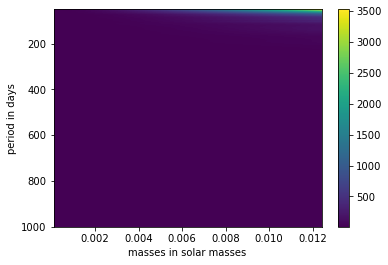

In [20]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(a, axis= 2),extent = [min(massestotest), max(massestotest),max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('period in days')
ax.set_xlabel('masses in solar masses')


Text(0.5, 0, 'masses in solar masses')

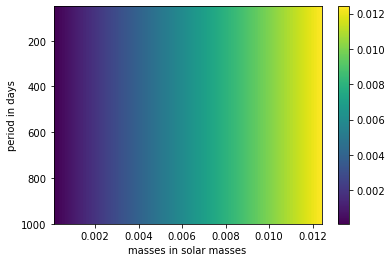

In [21]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(testedmasses, axis= 2),extent = [min(massestotest), max(massestotest),max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('period in days')
ax.set_xlabel('masses in solar masses')

Text(0.5, 0, 'masses in solar masses')

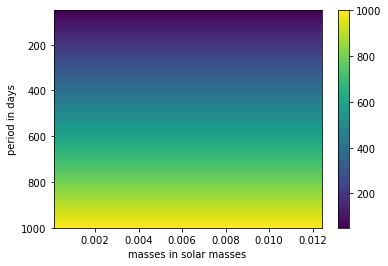

In [22]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(testedperiods, axis= 2),extent = [min(massestotest), max(massestotest),max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('period in days')
ax.set_xlabel('masses in solar masses')

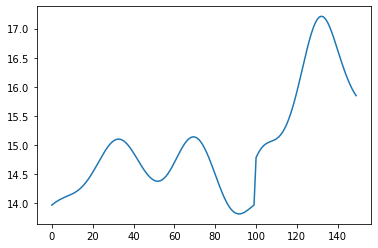

In [23]:
plt.plot(np.resize(a, 5*5*6))

In [26]:
np.savez("biggermeananomly135masstest.npz",a=a,massestotest=massestotest,periodstotest=periodstotest,periastrontotest=periastrontotest )

In [27]:
f=np.load('biggermeananomly135masstest.npz')
a = f["a"]
massestotest = f['massestotest']
periodstotest = f['periodstotest']
periastrontotest = f['periastrontotest']

In [28]:
print(f["a"])

[[[  13.97194605   13.99900087   14.02405818 ...   13.91505701
     13.94362013   13.97194751]
  [  14.78580845   14.85801036   14.91779237 ...   14.61090125
     14.70256726   14.78580797]
  [  16.85462076   16.98306339   17.0798192  ...   16.51229976
     16.69621252   16.85462076]
  ...
  [5625.7681988  5666.39097921 5667.00573394 ... 5421.64106817
   5543.75654531 5625.76821313]
  [5738.66982445 5779.94014513 5780.40575426 ... 5530.79462472
   5655.18181553 5738.6698255 ]
  [5852.63104643 5894.5515941  5894.86262415 ... 5640.98260653
   5767.65698183 5852.6310462 ]]

 [[  14.38160795   14.46415848   14.5440456  ...   14.21805477
     14.29876208   14.38160976]
  [  15.39370274   15.54431849   15.68813665 ...   15.08716363
     15.23999716   15.39370232]
  [  17.28141647   17.45537991   17.61764845 ...   16.91134045
     17.09886586   17.28141548]
  ...
  [3935.90146495 3732.87632676 3527.27815247 ... 4299.64965092
   4127.65007457 3935.90146566]
  [4013.9549333  3806.62949051 3596.

6.808982454326428e-07


<ipython-input-29-8a40078f8e3a>:8: RuntimeWarning: divide by zero encountered in log10
  im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood), -4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')


Text(0.5, 0, 'masses in Jupiter masses')

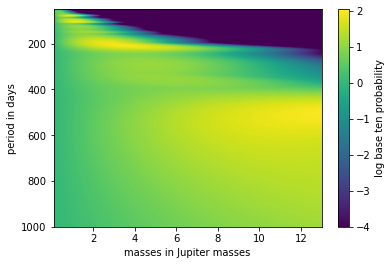

In [29]:
noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               135,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*np.min(a, axis= 2))

fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood), -4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_ylabel('period in days')
ax.set_xlabel('masses in Jupiter masses')

In [30]:
print(noplanetlikihood)
print(planetlikihood)
print(np.min(a, axis = 2))

6.808982454326428e-07
[[9.95593869e-07 7.29114455e-07 2.32269935e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.12107637e-06 1.20156603e-06 6.74485247e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.15421474e-06 4.35268634e-06 3.61236290e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.05066386e-07 7.37593929e-07 7.71317802e-07 ... 1.01180422e-05
  1.02404889e-05 1.03613137e-05]
 [7.04902283e-07 7.37195313e-07 7.70672572e-07 ... 1.00244198e-05
  1.01458695e-05 1.02657269e-05]
 [7.04732184e-07 7.36798290e-07 7.70023840e-07 ... 9.93084426e-06
  1.00512861e-05 1.01701918e-05]]
[[  13.81992642   14.13143511   15.27536563 ... 3390.23238673
  3458.72466385 3527.88088444]
 [  13.70122129   13.63188483   14.20931603 ... 2674.58529639
  2726.31923648 2778.50721012]
 [  13.04808429   12.34471735   12.53114846 ... 2613.61793534
  2665.27719315 2717.41530826]
 ...
 [  14.16497387   14.1198724    14.07516535 ...   11.50119037
    11.4891612    11.47743153]
 

In [31]:
#test=loglikelihood([massestotest[c],periodstotest[d],0.6,8.7598285693573246e+01,
                                              # 4.6220554014026838e-01,1.6437004273382669e+00,
                                               #meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)
#print(test)
#print(noplanetlikihood)

In [32]:
import numpy as np
f=np.load('biggermeananomly135masstest.npz')
a = f["a"]
ind = np.unravel_index(np.argmin(f["a"], axis=None), f["a"].shape)
print(ind)
print(f["periodstotest"][ind[0]])
print(f["massestotest"][ind[1]])
#meananomolytotest = np.linspace(0,360,100)
print(f["periastrontotest"][ind[2]])

(9, 6, 9)
78.59531772575251
0.0008417733404655546
32.72727272727273


[315.90886837 332.80413679 360.96292936 384.89789415 391.93759056
 394.7534865  401.79315997 415.87255671 425.72812932 439.80752397
  79.375085   211.721367   280.710383   290.565959   314.500916  ]
[315.91106169 332.80648191 360.96552241 384.90070585 391.94046091
 394.7563629  401.79612048 415.87564206 425.73130608 439.81082567
  79.37515727 211.72262752 280.71226725 290.5679309  314.50311078]


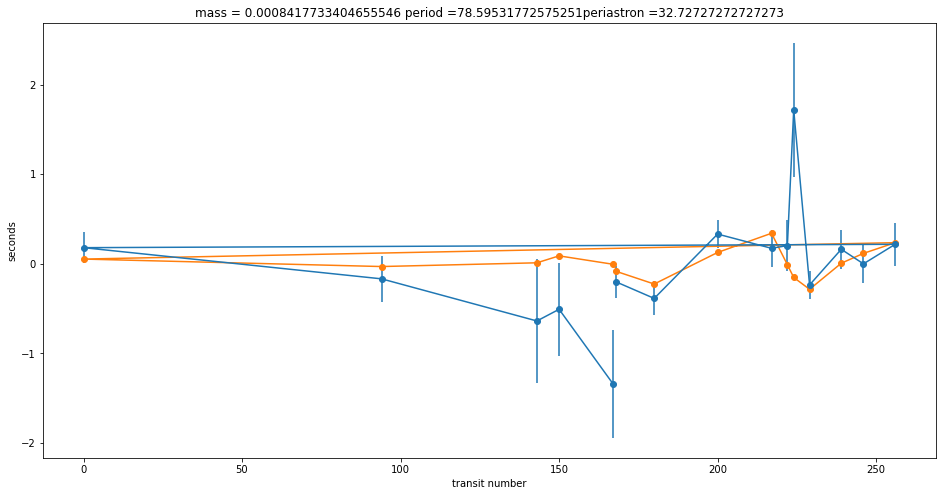

In [33]:
somethingwedontcareabout=np.exp(loglikelihood([f["massestotest"][ind[1]],f["periodstotest"][ind[0]],0,90,
                                               4.6220554014026838e-01,f["periastrontotest"][ind[2]],
                                               135,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)*-1)

6.808982454326428e-07
(300, 100, 100)
(300, 100)


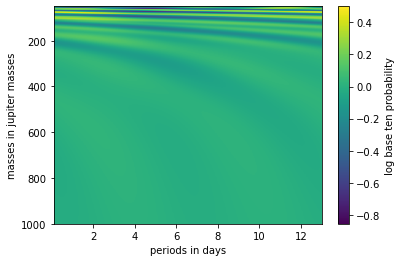

In [34]:

noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               135,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*a[:,0,:])
fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_xlabel('periods in days')
ax.set_ylabel('masses in jupiter masses')
print(np.shape(a))
print(np.shape(planetlikihood))

[315.90886837 332.80413679 360.96292936 384.89789415 391.93759056
 394.7534865  401.79315997 415.87255671 425.72812932 439.80752397
  79.375085   211.721367   280.710383   290.565959   314.500916  ]
[315.91730737 332.81338445 360.97356261 384.90943666 391.94934457
 394.76557223 401.80548035 415.88523083 425.74105606 439.82079611
  79.37521598 211.72485563 280.71696238 290.57290408 314.50930077]


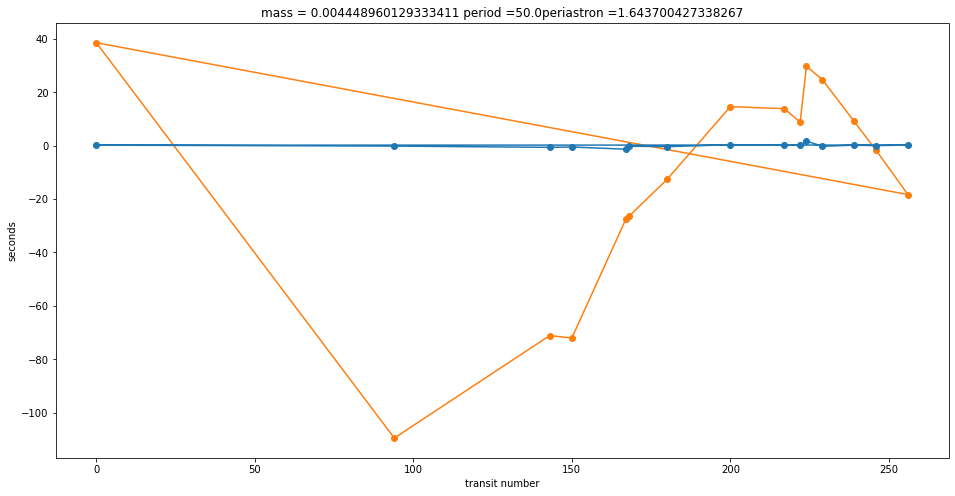

14.079285782171894
14.092858026828116
0.04646730963117831


In [35]:
test=loglikelihood([massestotest[35],periodstotest[0],0.6,8.7598285693573246e+01,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               135,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)
#print(test)
#print(noplanetlikihood)
#a[c,d,e]=loglikelihood([1/1047.572,130,ecentricitiestotest[c],inclinationstotest[d],
                                               #4.6220554014026838e-01,1.6437004273382669e+00,
                                               #meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr)
print(a[35,0,0])
print(a[35,0,1])
planetlikihood = np.exp(-1*a[35,0,1])
ratio = np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ) 
print(ratio)


In [36]:
#fig,ax= plt.subplots()
#im=ax.imshow(np.log(a[:,0,:]))
#np.shape(a[:,0,:])

In [37]:
#junk=np.random.uniform(0,1,(3,6))
#print(junk)
#fig,ax= plt.subplots()
#im=ax.imshow(junk)